In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.decomposition import PCA, NMF, FastICA, FactorAnalysis
from a72_utilities import *
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
al = normalize_array(imread('/Users/apple/Sync/Research/Alloy 72/Registration/Al_shifted.tif'))
cr = normalize_array(imread('/Users/apple/Sync/Research/Alloy 72/Registration/Cr_shifted.tif'))
fe = normalize_array(imread('/Users/apple/Sync/Research/Alloy 72/Registration/Fe_shifted.tif'))
ni = normalize_array(imread('/Users/apple/Sync/Research/Alloy 72/Registration/Ni_shifted.tif'))
ti = normalize_array(imread('/Users/apple/Sync/Research/Alloy 72/Registration/Ti_shifted.tif'))
bordersize = 32
xas, masks, photon_E = load_registered_xas()

stacked_xas = (np.vstack([ni,fe,cr,ti,al]))
print(stacked_xas.shape)
trimmed_xas = stacked_xas[:,bordersize:-bordersize,bordersize:-bordersize]
print(trimmed_xas.shape)
combined_xas = np.reshape(trimmed_xas,(404,(1024-2*bordersize)**2)).T
print(combined_xas.shape)
scaler = StandardScaler()
scaled_xas = scaler.fit_transform(combined_xas)

(404, 1024, 1024)
(404, 960, 960)
(921600, 404)


In [36]:
#Map the photon energies of the individual elements onto the energy of stacked elements
print((photon_E["Cr"]).shape)
stacked_Emap = np.concatenate([photon_E["Ni"],photon_E["Fe"],photon_E["Cr"],photon_E["Ti"],photon_E["Al"]])

(72,)


(404, 480, 480)


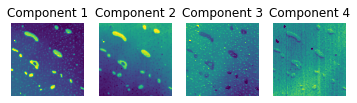

In [45]:
downsampled = block_reduce(stacked_xas,block_size=(1,2,2))
element_data = trim_edges(downsampled,16)

pca = PCA()
print(element_data.shape)
element_NxM = np.reshape(element_data,(len(element_data),element_data.shape[1]*element_data.shape[2])).T
scaled_element_NxM = scaler.fit_transform(element_NxM)
pca_results = pca.fit(scaled_element_NxM)
scores = pca_results.transform(scaled_element_NxM)
# #plot_pca_results(pca_results,scores,e_values=photon_e)
# plt.show()
show_score_imgs(scores,4,imsize=element_data.shape[1])
plt.show()

(404, 404)


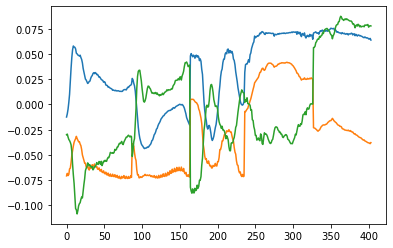

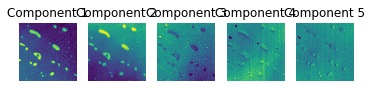

In [46]:
print(pca_results.components_.shape)
plt.plot(pca_results.components_[0,:])
plt.plot(pca_results.components_[1,:])
plt.plot(pca_results.components_[2,:])
plt.show()
show_score_imgs(scores,5,imsize=element_data.shape[1])


In [39]:
nmf = NMF(n_components=5)
nmf_results = nmf.fit(element_NxM)
nmf_scores = nmf_results.transform(element_NxM)


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


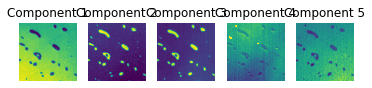

In [40]:
show_score_imgs(nmf_scores,5,imsize=element_data.shape[1])


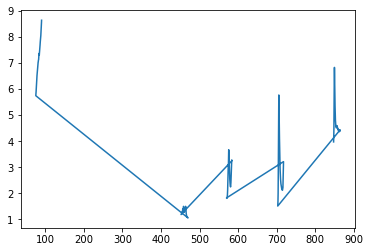

In [44]:
plt.plot(stacked_Emap,nmf_results.components_[0,:])

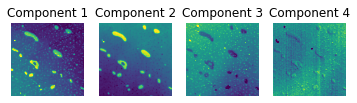

(5, 404)


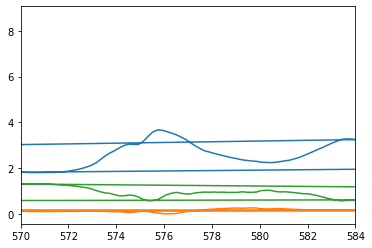

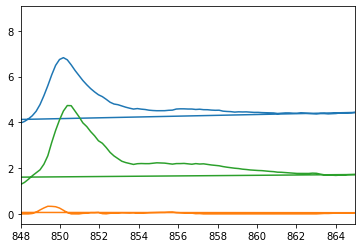

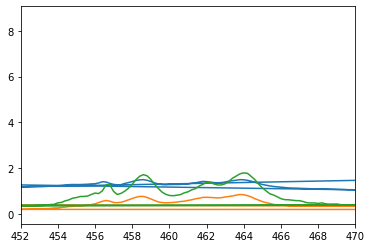

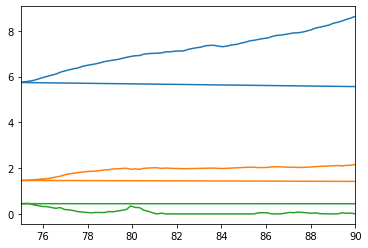

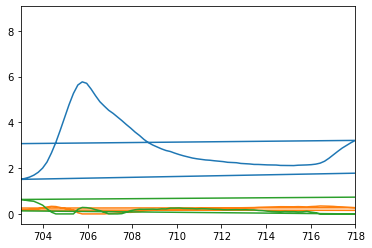

In [43]:
show_score_imgs(scores,4,imsize=element_data.shape[1])
plt.show()
print(nmf_results.components_.shape)
for element in ["Cr","Ni","Ti","Al","Fe"]:

    plt.plot(stacked_Emap,nmf_results.components_[0,:])
    plt.plot(stacked_Emap,nmf_results.components_[1,:])
    plt.plot(stacked_Emap,nmf_results.components_[2,:])
    plt.xlim((min(photon_E[element]),max(photon_E[element])))
    plt.show()

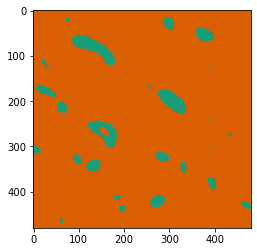

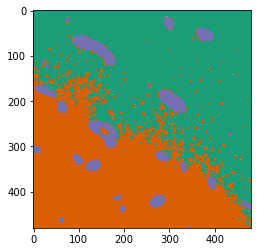

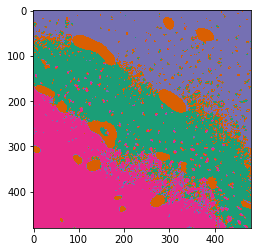

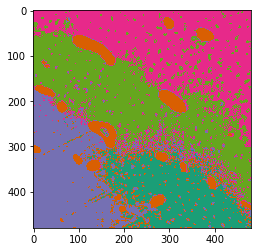

In [47]:
for i in range(4):
    kmeans = KMeans(n_clusters=i+2)
    kmeans_results = kmeans.fit_transform(scaled_element_NxM)

    colors = plt.cm.Dark2(np.arange(i+2))
    cmap = ListedColormap(colors)

    plt.imshow(np.reshape(kmeans.labels_,(480,480)).astype(int),cmap=cmap)
    plt.show()

In [42]:
for i in range(4):
    kmeans = KMeans(n_clusters=i+2)
    kmeans_results = kmeans.fit_transform(scaled_xas)

    colors = plt.cm.Dark2(np.arange(i+2))
    cmap = ListedColormap(colors)

    plt.imshow(np.reshape(kmeans.labels_,(1024-2*bordersize,1024-2*bordersize)).astype(int),cmap=cmap)
    plt.show()




KeyboardInterrupt: 